# <h1 style="text-align: center; font-size: 32px;">Retail Sales Prediction</h1>

## Problem Description

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

In [1]:
# importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import os ,sys
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
import time
import random

In [2]:
# Converting CSV files to Pandas DataFrame

sales_data = pd.read_csv(r"C:\Users\ksara\Downloads\Project_6\Hoffman_Stores_Data.csv")
stores_data = pd.read_csv(r"C:\Users\ksara\Downloads\Project_6\store.csv")

In [3]:
sales_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,31-07-2015,5263,555,1,1,0,1
1,2,5,31-07-2015,6064,625,1,1,0,1
2,3,5,31-07-2015,8314,821,1,1,0,1
3,4,5,31-07-2015,13995,1498,1,1,0,1
4,5,5,31-07-2015,4822,559,1,1,0,1


In [4]:
# Info about the sales dataset

sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


The Sales dataset has 1017209 observations and 9 features

In [5]:
stores_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [6]:
# Info about the stores dataset

stores_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


The Stores Dataset has 1115 observations and 10 feautures

In [7]:
# Checking for missing values in sales data

sales_data.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [8]:
# Checking for missing values in Stores data

stores_data.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [9]:
stores_data.isnull().sum().sum()

2343

In [10]:
# Filling the missingle values

from sklearn.impute import KNNImputer

list1 = ['CompetitionDistance','CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek','Promo2SinceYear']

def Imputing():
    
    imputer = KNNImputer(n_neighbors=5)
    
    for i in list1:
        imputed_column = imputer.fit_transform(stores_data[i].values.reshape(-1, 1))
        stores_data[i] = imputed_column.flatten()

Imputing()       

In [11]:
stores_data['PromoInterval'].unique()

array([nan, 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

Since the 'PromoInterval' column contains categorical values with multiple categories and no clear mode, filling the missing values with the mode may not be meaningful or appropriate. Hence filling it with 0's 

In [12]:
stores_data['PromoInterval'].fillna(value=0,inplace=True)

In [13]:
stores_data.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [14]:
#merge the datasets on stores data
data = sales_data.merge(right=stores_data, on="Store", how="left")

In [15]:
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,31-07-2015,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,23.595447,2011.763573,0
1,2,5,31-07-2015,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.000000,2010.000000,"Jan,Apr,Jul,Oct"
2,3,5,31-07-2015,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.000000,2011.000000,"Jan,Apr,Jul,Oct"
3,4,5,31-07-2015,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,23.595447,2011.763573,0
4,5,5,31-07-2015,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,23.595447,2011.763573,0


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [17]:
data.shape

(1017209, 18)

In [18]:
columns_list = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment','CompetitionOpenSinceMonth',
                         'CompetitionOpenSinceYear','Promo2','Promo2SinceWeek','Promo2SinceYear','PromoInterval']

In [19]:
# checks on the unique values and data types of specific columns 

for column in columns_list:
    print(column)
    print()
    print(set(data[column].tolist()))
    print("--------------------------------------")

DayOfWeek

{1, 2, 3, 4, 5, 6, 7}
--------------------------------------
Open

{0, 1}
--------------------------------------
Promo

{0, 1}
--------------------------------------
StateHoliday

{0, 'a', 'b', '0', 'c'}
--------------------------------------
SchoolHoliday

{0, 1}
--------------------------------------
StoreType

{'d', 'a', 'c', 'b'}
--------------------------------------
Assortment

{'a', 'c', 'b'}
--------------------------------------
CompetitionOpenSinceMonth

{1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.2247043363994745, 8.0, 9.0, 10.0, 11.0, 12.0, 7.0}
--------------------------------------
CompetitionOpenSinceYear

{1961.0, 1990.0, 1994.0, 1995.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.6688567674114, 2008.0, 2009.0, 2010.0, 2012.0, 2011.0, 2013.0, 2014.0, 2015.0, 1900.0}
--------------------------------------
Promo2

{0, 1}
--------------------------------------
Promo2SinceWeek

{1.0, 5.0, 6.0, 9.0, 10.0, 13.0, 14.0, 18.0, 22.0, 23.0,

In [20]:
data['StateHoliday'].replace({'0':0}, inplace=True)

## Feature Extraction

In [21]:
# converting Date column to datetime format.

data['Date'] = pd.to_datetime(data['Date'])

In [22]:
# extract specific components from the Date column 


data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['DayOfYear'] = data['Date'].dt.dayofyear

In [23]:
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,DayOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,1270.0,9.0,2008.0,0,23.595447,2011.763573,0,2015,7,212
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,570.0,11.0,2007.0,1,13.000000,2010.000000,"Jan,Apr,Jul,Oct",2015,7,212
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,14130.0,12.0,2006.0,1,14.000000,2011.000000,"Jan,Apr,Jul,Oct",2015,7,212
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,620.0,9.0,2009.0,0,23.595447,2011.763573,0,2015,7,212
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,29910.0,4.0,2015.0,0,23.595447,2011.763573,0,2015,7,212


## Exploratory Data Analysis

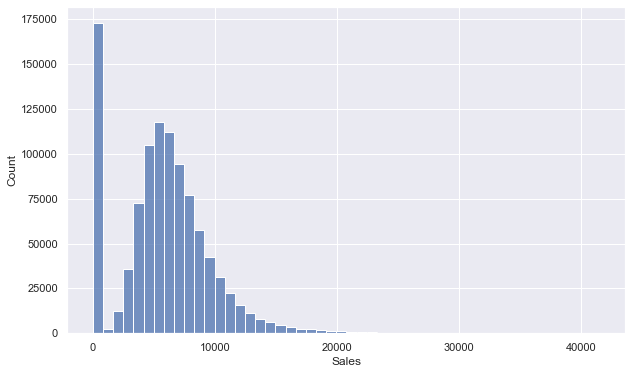

In [24]:
plt.figure(figsize=(10,6))
sns.histplot(data['Sales'], bins=50)
plt.show()

The drop in sales observed in the histogram plot indicates the presence of zero sales values. This drop could be due to refurbishment

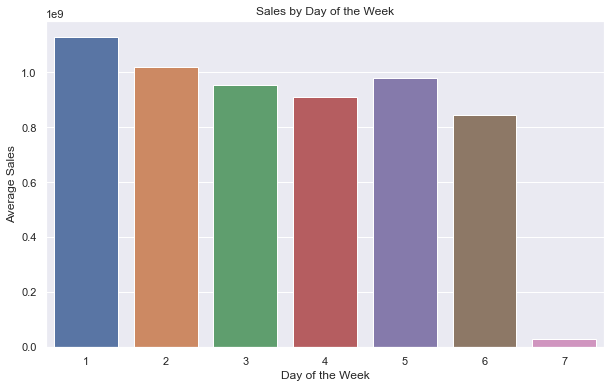

In [25]:
sales_by_dayofweek = data.groupby('DayOfWeek')['Sales'].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_dayofweek.index, y=sales_by_dayofweek.values)
plt.title('Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Sales')
plt.show()

Mondays have higher sales compared to other days. Since many shops remain closed on Sundays, customers tend to do their shopping on Mondays, leading to higher sales on that day.

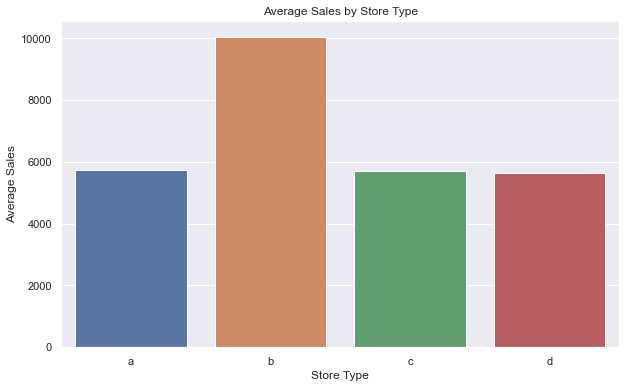

In [26]:
# 5. Examine Store Types and Sales
sales_by_storetype = data.groupby('StoreType')['Sales'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_storetype.index, y=sales_by_storetype.values)
plt.title('Average Sales by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Average Sales')
plt.show()

Store Type 'b' is contributing higher sales compared to the other store types.

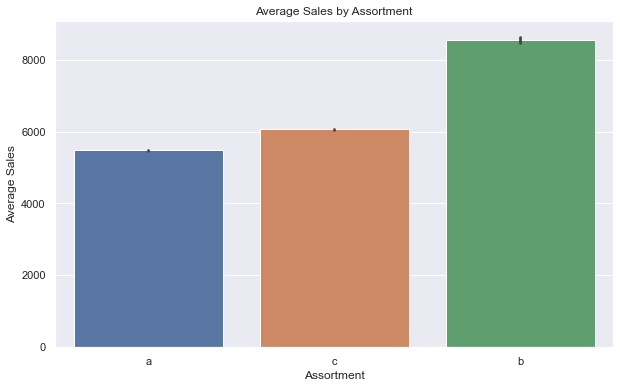

In [27]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Assortment', y='Sales', data=data)
plt.title('Average Sales by Assortment')
plt.xlabel('Assortment')
plt.ylabel('Average Sales')
plt.show()

It indicates that the stores with an 'extra' assortment level are performing well in terms of sales compared to the other assortment levels.

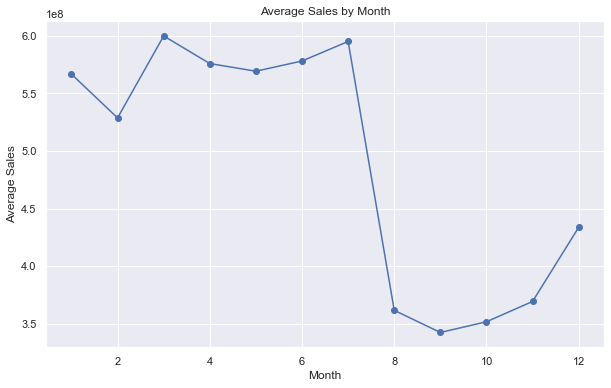

In [28]:
# 8. Explore Seasonality
sales_by_month = data.groupby('Month')['Sales'].sum()
plt.figure(figsize=(10, 6))
sales_by_month.plot(marker='o')
plt.title('Average Sales by Month')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.show()

The rise in sales towards the end of the year before the holidays aligns with the common trend of increased consumer spending during the holiday season.

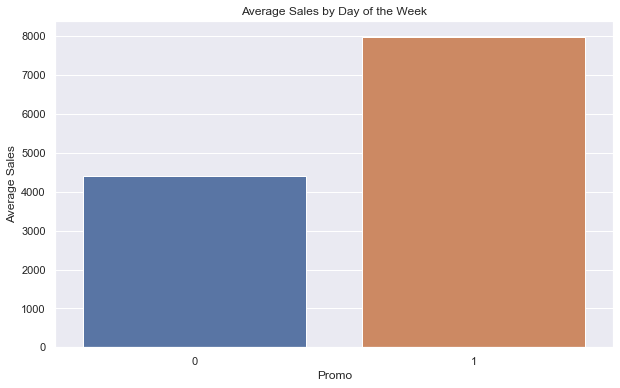

In [29]:
# 3. Analyze Sales Variation by Day of the Week
sales_by_dayofweek = data.groupby('Promo')['Sales'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_dayofweek.index, y=sales_by_dayofweek.values)
plt.title('Average Sales by Day of the Week')
plt.xlabel('Promo')
plt.ylabel('Average Sales')
plt.show()

Promotional offers and discounts often attract customers and encourage them to make purchases, resulting in increased sales.

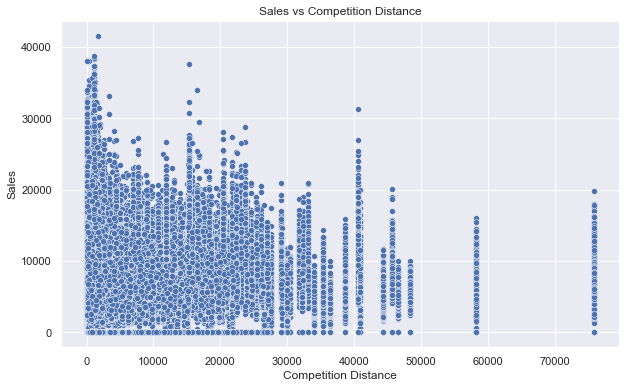

In [30]:
# 6. Assess Competition Impact
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='CompetitionDistance', y='Sales')
plt.title('Sales vs Competition Distance')
plt.xlabel('Competition Distance')
plt.ylabel('Sales')
plt.show()

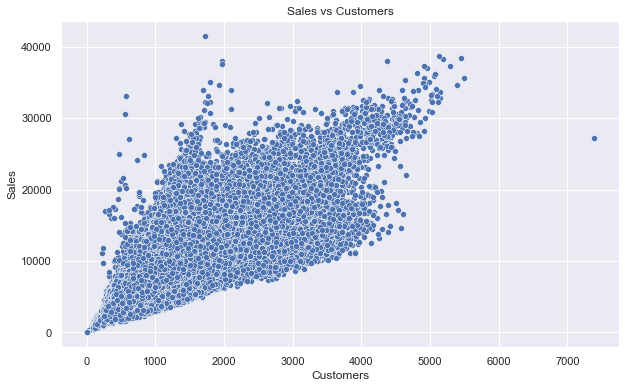

In [31]:
# 9. Analyze Customer Behavior
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Customers', y='Sales')
plt.title('Sales vs Customers')
plt.xlabel('Customers')
plt.ylabel('Sales')
plt.show()

It says that as the number of customers increases, the sales tend to increase as well.

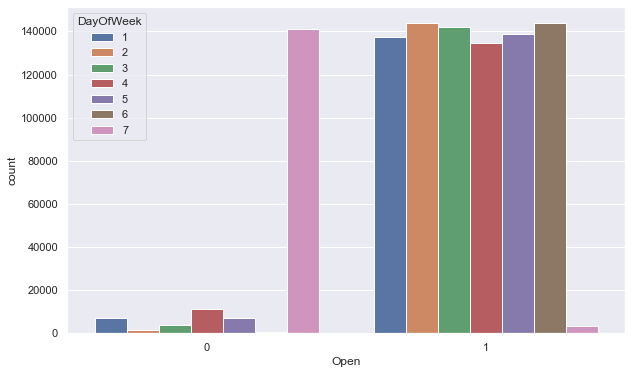

In [32]:
plt.figure(figsize=(10, 6))
sns.countplot(x=data["Open"], hue=data["DayOfWeek"])
plt.show()

The count plot shows the distribution of open shops according to the day of the week. From the plot, it is evident that the number of open shops on Sundays is significantly lower compared to other days of the week. This could be due to the fact that many shops are typically closed on Sundays, resulting in lower sales on those days.

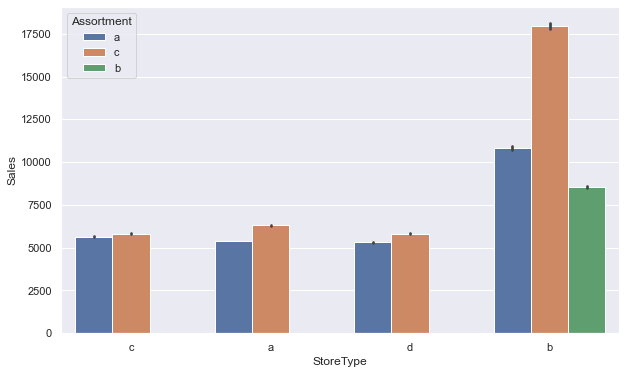

In [33]:
plt.figure(figsize=(10,6))
sns.barplot(x=data["StoreType"],y=data['Sales'],hue=data["Assortment"])
plt.show()

It appears that store types "a", "c", and "d" have a limited range of assortment levels, specifically levels "a" and "c". In contrast, store type "b" includes all three assortment strategies: "a", "b", and "c". 

This allows store type "b" to cater to a wider range of customer preferences, potentially leading to higher sales.

In [34]:
(data[data.Open == 0]).shape

(172817, 21)

It is mentioned in the problem statement that some stores were temporarily closed for refurbishment

In [35]:
# Dropping the Open column

df = data[data.Open != 0]
df.drop('Open', axis=1, inplace=True)

In [36]:
df.head(1)

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,DayOfYear
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,23.595447,2011.763573,0,2015,7,212


<AxesSubplot:xlabel='Sales', ylabel='Count'>

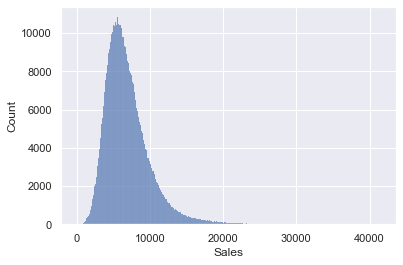

In [37]:
# Creating the distribution plot
sns.histplot(df['Sales'])

## Feature Engineering 

In [38]:
df['StateHoliday'].replace({'a':1, 'b':1,'c':1}, inplace=True)

In [39]:
df['CompetitionOpenSince'] = pd.to_datetime(df['CompetitionOpenSinceYear'].astype(int).astype(str) + '-' + df['CompetitionOpenSinceMonth'].astype(int).astype(str) + '-1')
df['CompetitionOpenDurationWeeks'] = (df['Date'] - df['CompetitionOpenSince']).dt.days // 7
df["CompetitionOpenDurationWeeks"] = df["CompetitionOpenDurationWeeks"].apply(lambda x: max(x, 0))
df.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'CompetitionOpenSince'], axis=1, inplace=True)

To make it easier to work with this information, we convert the month and year columns into weeks.

In [40]:
from datetime import datetime, timedelta

df['Promo2SinceWeek'] = df['Promo2SinceWeek'].fillna(0).astype(int)
df['Promo2SinceYear'] = df['Promo2SinceYear'].fillna(0).astype(int)
df['Promo2Since'] = pd.to_datetime(df['Promo2SinceYear'].astype(str) + ' ' + df['Promo2SinceWeek'].astype(str) + ' 1', format='%Y %W %w')

df['Promo2DurationWeeks'] = ((df['Date'] - df['Promo2Since']) / timedelta(weeks=1)).astype(int)
df["Promo2DurationWeeks"] = df["Promo2DurationWeeks"].apply(lambda x: max(x, 0))

df.drop(['Promo2SinceWeek', 'Promo2SinceYear', 'Promo2Since'], axis=1, inplace=True)

Along with competition related features we convert the month and year columns into weeks for Promo features as well

In [41]:
df['PromoInterval'].unique()

array([0, 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

In [42]:
# Create a list of unique promo intervals
promo_intervals = df['PromoInterval'].unique()

# Create a list of all months
all_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

# Create a function to check if a month is in the promo interval
def is_month_in_promo_interval(month, promo_interval):
    if isinstance(promo_interval, str):  # Check if promo_interval is a string
        if month in promo_interval.split(','):
            return 1
    return 0

# Applying the function to create a new column 'Promo2running'
df['IsPromoMonth'] = df.apply(lambda x: is_month_in_promo_interval(all_months[x['Month'] - 1], x['PromoInterval']), axis=1)


# Drop the 'PromoInterval' column
df.drop('PromoInterval', axis=1, inplace=True)

we are creating a new column "IsPromoMonth" to indicate if a particular month is within a promo interval based on the 'PromoInterval' column.

In [43]:
df['IsPromoMonth'].unique()

array([0, 1], dtype=int64)

In [44]:
df.set_index(['Date','Store'],inplace=True)

df.sort_index(inplace=True)

By setting and sorting the index, you are organizing the data in a way that makes it easier to access and analyze specific subsets of the data based on the 'Date' and 'Store' values.

In [45]:
df.head()

DayOfWeek  Sales  Customers  Promo  StateHoliday  \
Date       Store                                                     
2013-01-01 85             2   4220        619      0             1   
           259            2   6851       1444      0             1   
           262            2  17267       2875      0             1   
           274            2   3102        729      0             1   
           335            2   2401        482      0             1   

                  SchoolHoliday StoreType Assortment  CompetitionDistance  \
Date       Store                                                            
2013-01-01 85                 1         b          a               1870.0   
           259                1         b          b                210.0   
           262                1         b          a               1180.0   
           274                1         b          b               3640.0   
           335                1         b          a                 90.0   

                  Promo2  Year  Month  DayOfYear  \
Date       Store                                   
2013-01-01 85          0  2013      1          1   
           259         0  2013      1          1   
           262         0  2013      1          1   
           274         1  2013      1          1   
           335         1  2013      1          1   

                  CompetitionOpenDurationWeeks  Promo2DurationWeeks  \
Date       Store                                                      
2013-01-01 85                               65                   82   
           259                             235                   82   
           262                               0                   82   
           274                             235                    0   
           335                             235                    0   

                  IsPromoMonth  
Date       Store                
2013-01-01 85                0  
           259               0  
           262               0  
           274               1  
           335               1

In [46]:
# Calculate z-scores
mean_sales = np.mean(df['Sales'])
std_sales = np.std(df['Sales'])
threshold = 3

# Identify outliers
outliers = df[(df['Sales'] - mean_sales) / std_sales > threshold]

# Separate outliers from the DataFrame
non_outliers = df[(df['Sales'] - mean_sales) / std_sales <= threshold]

# Print the total number of outliers
print(f'Total number of outliers in the Sales column: {len(outliers)}')

Total number of outliers in the Sales column: 13437


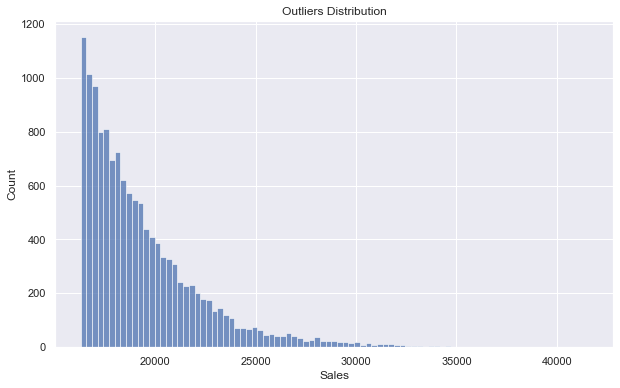

In [47]:
# Plotting the outlier distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=outliers, x='Sales')
plt.title('Outliers Distribution')
plt.xlabel('Sales')
plt.ylabel('Count')
plt.show()

In [48]:
sales_outliers = df.loc[df['Sales']> 25000]

In [49]:
df.shape

(844392, 16)

In [50]:
# Remove outliers from df based on sales_outliers
df_cleaned = df[~df.index.isin(sales_outliers.index)]

In [51]:
df_cleaned.shape

(843634, 16)

In [52]:
df1 = df_cleaned

In [53]:
df2 = df1.copy()

In [54]:
df2.head()

DayOfWeek  Sales  Customers  Promo  StateHoliday  \
Date       Store                                                     
2013-01-01 85             2   4220        619      0             1   
           259            2   6851       1444      0             1   
           262            2  17267       2875      0             1   
           274            2   3102        729      0             1   
           335            2   2401        482      0             1   

                  SchoolHoliday StoreType Assortment  CompetitionDistance  \
Date       Store                                                            
2013-01-01 85                 1         b          a               1870.0   
           259                1         b          b                210.0   
           262                1         b          a               1180.0   
           274                1         b          b               3640.0   
           335                1         b          a                 90.0   

                  Promo2  Year  Month  DayOfYear  \
Date       Store                                   
2013-01-01 85          0  2013      1          1   
           259         0  2013      1          1   
           262         0  2013      1          1   
           274         1  2013      1          1   
           335         1  2013      1          1   

                  CompetitionOpenDurationWeeks  Promo2DurationWeeks  \
Date       Store                                                      
2013-01-01 85                               65                   82   
           259                             235                   82   
           262                               0                   82   
           274                             235                    0   
           335                             235                    0   

                  IsPromoMonth  
Date       Store                
2013-01-01 85                0  
           259               0  
           262               0  
           274               1  
           335               1

In [55]:
df2 = df2.drop('DayOfYear', axis=1)

In [56]:
df2.head(1)

,,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,Month,CompetitionOpenDurationWeeks,Promo2DurationWeeks,IsPromoMonth
Date,Store,,,,,,,,,,,,,,,
2013-01-01,85,2,4220,619,0,1,1,b,a,1870.0,0,2013,1,65,82,0


In [57]:
df2.tail(2)

DayOfWeek  Sales  Customers  Promo  StateHoliday  \
Date       Store                                                     
2015-07-31 1113           5   7289        720      1             0   
           1115           5   8680        538      1             0   

                  SchoolHoliday StoreType Assortment  CompetitionDistance  \
Date       Store                                                            
2015-07-31 1113               1         a          c               9260.0   
           1115               1         d          c               5350.0   

                  Promo2  Year  Month  CompetitionOpenDurationWeeks  \
Date       Store                                                      
2015-07-31 1113        0  2015      7                           369   
           1115        1  2015      7                           369   

                  Promo2DurationWeeks  IsPromoMonth  
Date       Store                                     
2015-07-31 1113                   216             0  
           1115                   165             0

In [58]:
#slicing the most recent six weeks and creating train and test set
#train
start_train = pd.to_datetime("2013-01-01")
end_train = pd.to_datetime("2015-06-30")
df2_train = df2.loc[start_train:end_train]

#test
start_test = pd.to_datetime("2015-07-01")
end_test = pd.to_datetime("2015-07-31")
df_test = df2.loc[start_test:end_test]

In [59]:
df2_train.shape

(813464, 15)

In [60]:
sample_size = 100000
sample = df2_train.sample(n=sample_size, random_state=42)

In [61]:
X = sample.drop('Sales', axis=1)  # Features
y = sample['Sales']  # Target variable

In [62]:
X_train = X
y_train = y

In [63]:
X_test = df_test.drop('Sales',axis=1)
y_test = df_test[['Sales']]

In [64]:
print(f'The shape of X_train is: {X_train.shape}')
print(f'The shape of y_train is: {y_train.shape}')
print(f'The shape of X_test is: {X_test.shape}')
print(f'The shape of y_test is: {y_test.shape}')

The shape of X_train is: (100000, 14)
The shape of y_train is: (100000,)
The shape of X_test is: (30170, 14)
The shape of y_test is: (30170, 1)


In [65]:
#importing
from sklearn.preprocessing import OneHotEncoder
#categorical features
categorical_cols = ['DayOfWeek', 'StoreType', 'Assortment']
#fit encoder
encoder = OneHotEncoder(sparse=False)
# train
encoder.fit(X_train[categorical_cols])
encoded_features = list(encoder.get_feature_names_out(categorical_cols))
X_train[encoded_features] = encoder.transform(X_train[categorical_cols])
# test
X_test[encoded_features] = encoder.transform(X_test[categorical_cols])
# drop original features
X_train.drop(categorical_cols,axis=1,inplace=True)
X_test.drop(categorical_cols,axis=1,inplace=True)

In [66]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Scale the features in the training set
X_train_scaled = scaler.fit_transform(X_train)

# Scale the features in the testing set
X_test_scaled = scaler.transform(X_test)

# Scale the target variable in the training set
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()

# Scale the target variable in the testing set
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1)).flatten()

In [67]:
X_train.head()

,,Customers,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Promo2,Year,Month,CompetitionOpenDurationWeeks,Promo2DurationWeeks,...,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
Date,Store,,,,,,,,,,,,,,,,,,,,,
2013-11-26,356,354,0,0,0,8970.000000,1,2013,11,312,78,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2014-05-08,291,903,1,0,0,5404.901079,0,2014,5,305,152,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2015-05-12,379,472,0,0,0,6630.000000,0,2015,5,358,205,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2014-04-08,60,695,0,0,0,5540.000000,0,2014,4,235,148,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2013-11-05,939,637,1,0,0,1340.000000,0,2013,11,279,126,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


## Modeling

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [69]:
lr = LinearRegression()

In [70]:
lr.fit(X_train, y_train)

LinearRegression()

In [71]:
y_pred_lr = lr.predict(X_test)

In [72]:
print("Coefficients:", lr.coef_)
print("Intercept:", lr.intercept_)

Coefficients: [ 7.38323747e+00  1.26077887e+03  1.00909884e+02  1.09868119e+02
  2.42966333e-02  3.76864936e+02  9.17347578e+01  2.57081535e+01
  1.03428251e-01  1.72963098e+00 -3.03676360e+01  3.59026909e+02
 -8.81505948e+01 -2.43299831e+02 -3.09679130e+02 -1.54906887e+02
  2.22880977e+02  2.14128557e+02  5.47938460e+02 -2.60806460e+03
  3.81655687e+02  1.67847046e+03  1.26496378e+03 -2.84883491e+03
  1.58387113e+03]
Intercept: -186870.363650082


In [73]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [74]:
# Calculate evaluation metrics
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)
n = len(y_test)
k = df2.shape[1]
adjusted_r2_lr = 1 - (1 - r2_lr) * (n - 1) / (n - k - 1)

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae_lr)
print("Mean Squared Error (MSE):", mse_lr)
print("Root Mean Squared Error (RMSE):", rmse_lr)
print("R-squared (R²):", r2_lr)
print("Adjusted R-squared:", adjusted_r2_lr)

Mean Absolute Error (MAE): 927.7573771909923
Mean Squared Error (MSE): 1598709.710472013
Root Mean Squared Error (RMSE): 1264.4009294808404
R-squared (R²): 0.8090838431317424
Adjusted R-squared: 0.8089888725688644


Text(0, 0.5, 'Predicted Y')

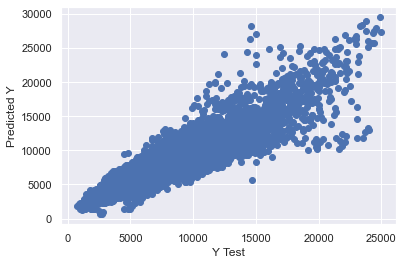

In [75]:
plt.scatter(y_test,y_pred_lr)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [76]:
#Importing libraries 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [77]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [78]:
y_pred_dt = dt.predict(X_test)

Text(0, 0.5, 'Predicted Y')

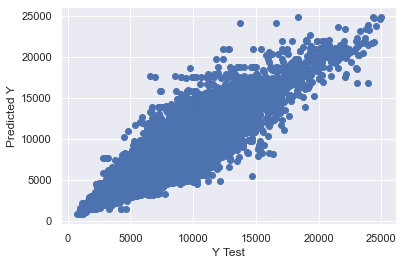

In [79]:
plt.scatter(y_test,y_pred_dt)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [80]:
# Calculate evaluation metrics
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)
n = len(y_test)
k = df2.shape[1]
adjusted_r2_dt = 1 - (1 - r2_dt) * (n - 1) / (n - k - 1)

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae_dt)
print("Mean Squared Error (MSE):", mse_dt)
print("Root Mean Squared Error (RMSE):", rmse_dt)
print("R-squared (R²):", r2_dt)
print("Adjusted R-squared:", adjusted_r2_dt)

Mean Absolute Error (MAE): 844.1389128273119
Mean Squared Error (MSE): 1515404.1090155784
Root Mean Squared Error (RMSE): 1231.017509629972
R-squared (R²): 0.8190321065165727
Adjusted R-squared: 0.8189420846819155
